# Boosting

In [98]:
import numpy as np 
from tensorflow.keras.datasets import mnist
from sklearn import metrics
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

## Import data

In [99]:
(train_X_unshaped, train_y), (test_X_unshaped, test_y) = mnist.load_data()

print('X_train: ' + str(train_X_unshaped.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X_unshaped.shape))
print('Y_test:  '  + str(test_y.shape))
print(train_y)

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)
[5 0 4 ... 5 6 8]


## Preprocess data

In [100]:
train_X = train_X_unshaped.reshape(train_X_unshaped.shape[0], train_X_unshaped.shape[1]*train_X_unshaped.shape[2])/255.0
test_X = test_X_unshaped.reshape(test_X_unshaped.shape[0], test_X_unshaped.shape[1]*test_X_unshaped.shape[2])/255.0
print('X_train shape: ' + str(train_X.shape))
print('X_test shape:  '  + str(test_X.shape))
print('X_train range: [' + str(min(train_X[0])) + ", " + str(max(train_X[0])) + "]")
print('X_test range: ['  + str(min(train_X[0])) + ", " + str(max(train_X[0])) + "]")

X_train shape: (60000, 784)
X_test shape:  (10000, 784)
X_train range: [0.0, 1.0]
X_test range: [0.0, 1.0]


## Create model

In [105]:
def train_model_clf(est, X, y):
    est.fit(X, y)
    y_pred = est.predict(X)
    
    acc_score = accuracy_score(y, y_pred)
    print('Accuracy score : ' + str(acc_score))

def test_model_clf(est, X, y):
    y_pred = est.predict(X)
    print("Classification Report")
    print(classification_report(y, y_pred))

    print("Confusion Matrix")
    cmd = ConfusionMatrixDisplay(confusion_matrix(y, y_pred))
    cmd.plot()
    plt.title("Confusion Matrix")
    plt.show()

In [107]:
cv = ShuffleSplit(n_splits=10,  test_size=.2)
ada_pipeline = Pipeline([("classifier", AdaBoostClassifier())])
print("AdaBoost w/ 10 estimators")
train_model_clf(ada_pipeline, train_X, train_y.ravel())

AdaBoost w/ 10 estimators
Accuracy score : 0.7284333333333334


## Run model

AdaBoost w/ 10 estimators
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       980
           1       0.85      0.94      0.90      1135
           2       0.79      0.58      0.67      1032
           3       0.68      0.67      0.68      1010
           4       0.72      0.72      0.72       982
           5       0.69      0.59      0.64       892
           6       0.72      0.86      0.78       958
           7       0.68      0.78      0.73      1028
           8       0.66      0.68      0.67       974
           9       0.62      0.55      0.58      1009

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.73     10000

Confusion Matrix


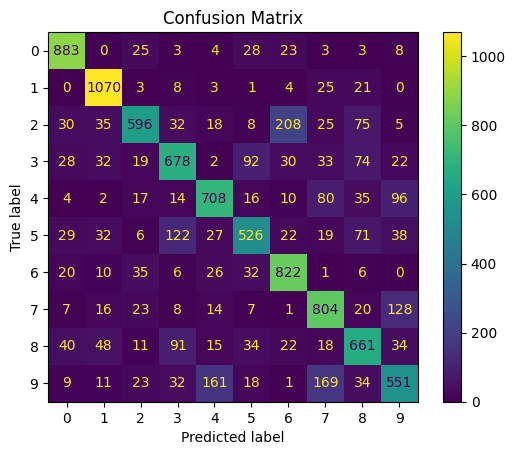

In [108]:
print("AdaBoost w/ 10 estimators")
test_model_clf(ada_pipeline, test_X, test_y)

In [109]:
ada_pipeline_20 = Pipeline([("classifier", AdaBoostClassifier(n_estimators=25))])
print("AdaBoost w/ 25 estimators")
train_model_clf(ada_pipeline_20, train_X, train_y.ravel())

AdaBoost w/ 25 estimators
Accuracy score : 0.70035


AdaBoost w/ 25 estimators
Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       980
           1       0.78      0.93      0.85      1135
           2       0.70      0.57      0.63      1032
           3       0.62      0.64      0.63      1010
           4       0.72      0.66      0.69       982
           5       0.68      0.58      0.62       892
           6       0.74      0.77      0.76       958
           7       0.66      0.81      0.73      1028
           8       0.65      0.61      0.63       974
           9       0.65      0.54      0.59      1009

    accuracy                           0.71     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.71      0.70     10000

Confusion Matrix


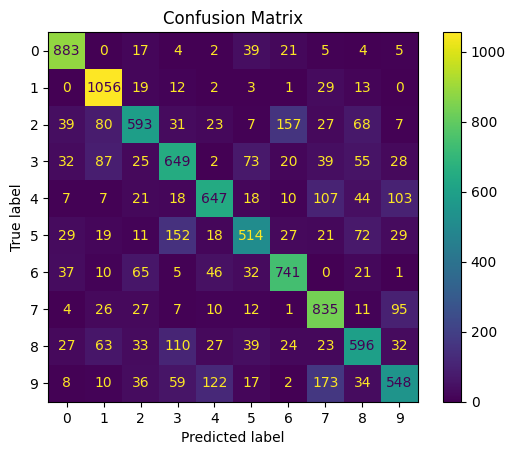

In [110]:
print("AdaBoost w/ 25 estimators")
test_model_clf(ada_pipeline_20, test_X, test_y)

In [111]:
grad_pipeline = Pipeline([("classifier", GradientBoostingClassifier(n_estimators=10))])
print("GradientBoost w/ 10 estimators")
train_model_clf(grad_pipeline, train_X, train_y.ravel())

GradientBoost w/ 10 estimators
Accuracy score : 0.8423


GradientBoost w/ 10 estimators
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       980
           1       0.89      0.95      0.92      1135
           2       0.90      0.83      0.86      1032
           3       0.81      0.84      0.83      1010
           4       0.79      0.85      0.82       982
           5       0.87      0.70      0.78       892
           6       0.93      0.85      0.89       958
           7       0.91      0.82      0.86      1028
           8       0.76      0.81      0.78       974
           9       0.75      0.83      0.79      1009

    accuracy                           0.85     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000

Confusion Matrix


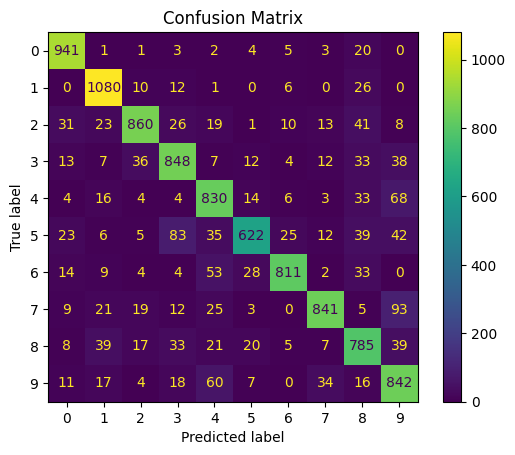

In [112]:
print("GradientBoost w/ 10 estimators")
test_model_clf(grad_pipeline, test_X, test_y)

## Grid search approach

In [85]:
from sklearn.model_selection import GridSearchCV
import warnings

clf = AdaBoostClassifier()
param_grid = [
  {'n_estimators':[10, 15, 30], 'learning_rate':[.1, 1, 10], 'algorithm':["SAMME", "SAMME.R"]}
]
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gs = GridSearchCV(clf, param_grid, verbose=3)
    gs_results = gs.fit(train_X, train_y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=10;, score=0.226 total time=  13.3s
[CV 2/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=10;, score=0.222 total time=  13.1s
[CV 3/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=10;, score=0.225 total time=  13.1s
[CV 4/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=10;, score=0.227 total time=  13.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=10;, score=0.225 total time=  12.9s
[CV 1/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=15;, score=0.275 total time=  19.4s
[CV 2/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=15;, score=0.318 total time=  19.2s
[CV 3/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=15;, score=0.225 total time=  19.5s
[CV 4/5] END algorithm=SAMME, learning_rate=0.1, n_estimators=15;, score=0.227 total time=  19.5s
[CV 5/5] END algorithm=SAMME, learning_rate=0.1, n_estima

In [87]:
print("Grid search best params: " + str(gs_results.best_params_))
print("Best Accuracy: " + str(gs_results.best_score_))

acc = gs_results.best_estimator_.score(test_X, test_y)
print("best model accuracy on test set: " + str(acc))

Grid search best params: {'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 30}
Best Accuracy: 0.6956666666666667
best model accuracy on development set: 0.7071
